<a href="https://colab.research.google.com/github/ZyLiao-0011/NX414/blob/main/BLCI_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import json
import os

data_root = '/content/drive/MyDrive/NX414_Plots/jsonfile'

In [25]:
def visualize_data(json_file_path):

    # Extract the model name from the filename (before the first underscore)
    filename = os.path.basename(json_file_path)
    model_name = filename.split('_')[0]
    print('Model Name:', model_name)

    with open(json_file_path, 'r') as json_file:
      data = json.load(json_file)
    # Print just the layer names (top-level keys)

    print('Number of Layers:', len(data))
    print("Layers:")
    for layer_name in data.keys():
        print(layer_name)

In [36]:
def extract_data(json_file_path, layer, mode='ev'):

    filename = os.path.basename(json_file_path)
    model_name = filename.split('_')[0]

    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)

    if layer not in data:
        print(f'Error: Layer "{layer}" not found in the JSON file.')
        print('Available layers:', list(data.keys()))
        return None

    if mode == 'ev':
        print('Model name:', model_name, 'layer:', layer, 'mode: exp_variances')
        extracted_data = data[layer].get('exp_variances')
    elif mode == 'corr':
        print('Model name:', model_name, 'layer:', layer, 'mode: correlations')
        extracted_data = data[layer].get('correlations')
    else:
        print('Invalid mode. Choose either "ev" or "corr".')
        return None

    if extracted_data is None:
        print(f'Warning: The selected mode "{mode}" is not present in layer "{layer}".')
    return np.array(extracted_data)

In [41]:
alexnet_path = os.path.join(data_root, 'task-driven/alexnet_best1e5.json')
mobilenet_path = os.path.join(data_root, 'task-driven/mobilenet_best1e5.json')
resnet18_path = os.path.join(data_root, 'task-driven/resnet18_best1e5.json')
resnet50_path = os.path.join(data_root, 'task-driven/resnet50_1e5.json')
vgg16_path = os.path.join(data_root, 'task-driven/vgg16_best1e5.json')
vit_path = os.path.join(data_root, 'task-driven/vit_best1e5.json')

In [42]:
visualize_data(alexnet_path)
visualize_data(mobilenet_path)
visualize_data(resnet18_path)
visualize_data(resnet50_path)
visualize_data(vgg16_path)
visualize_data(vit_path)

Model Name: alexnet
Number of Layers: 4
Layers:
features.0
features.2
features.5
features.12
Model Name: mobilenet
Number of Layers: 6
Layers:
features.0
features.3
features.6
features.10
features.14
features.18
Model Name: resnet18
Number of Layers: 5
Layers:
conv1
layer1
layer2
layer3
layer4
Model Name: resnet50
Number of Layers: 5
Layers:
conv1
layer1
layer2
layer3
layer4
Model Name: vgg16
Number of Layers: 5
Layers:
features.4
features.9
features.16
features.23
features.30
Model Name: vit
Number of Layers: 3
Layers:
conv_proj
encoder
heads


Model name: resnet18 layer: layer4 mode: exp_variances
Model name: resnet18 layer: layer3 mode: exp_variances
Model name: resnet18 layer: layer2 mode: exp_variances
Model name: resnet18 layer: layer1 mode: exp_variances
Model name: resnet18 layer: conv1 mode: exp_variances


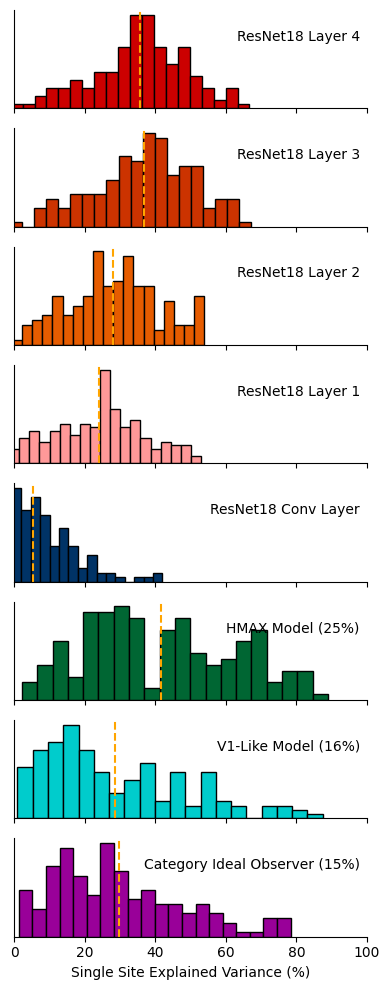

In [44]:
#panel b
import numpy as np
import matplotlib.pyplot as plt

# Simulated example data (replace with your actual explained variance data)
n_bins = 20
data_dict = {
    'ResNet18 Layer 4': extract_data(resnet18_path, layer='layer4', mode='ev') * 100, # 从这儿改
    'ResNet18 Layer 3': extract_data(resnet18_path, layer='layer3', mode='ev') * 100,
    'ResNet18 Layer 2': extract_data(resnet18_path, layer='layer2', mode='ev') * 100,
    'ResNet18 Layer 1': extract_data(resnet18_path, layer='layer1', mode='ev') * 100,
    'ResNet18 Conv Layer': extract_data(resnet18_path, layer='conv1', mode='ev') * 100,
    'HMAX Model (25%)': np.random.beta(2, 3, 168) * 100,
    'V1-Like Model (16%)': np.random.beta(1.5, 3.5, 168) * 100,
    'Category Ideal Observer (15%)': np.random.beta(1.5, 3.8, 168) * 100,
}

colors = ['#cc0000', '#cc3300', '#e65c00', '#ff9999',
          '#003366', '#006633', '#00cccc', '#990099']

fig, axes = plt.subplots(len(data_dict), 1, figsize=(4, 10), sharex=True)

for ax, (label, data), color in zip(axes, data_dict.items(), colors):
    ax.hist(data, bins=n_bins, color=color, edgecolor='black')
    ax.axvline(np.mean(data), color='orange', linestyle='--')  # Mean line
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xlim(0, 100)
    ax.text(0.98, 0.8, label, transform=ax.transAxes, ha='right', va='top')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[-1].set_xlabel('Single Site Explained Variance (%)')
plt.tight_layout()
plt.show()

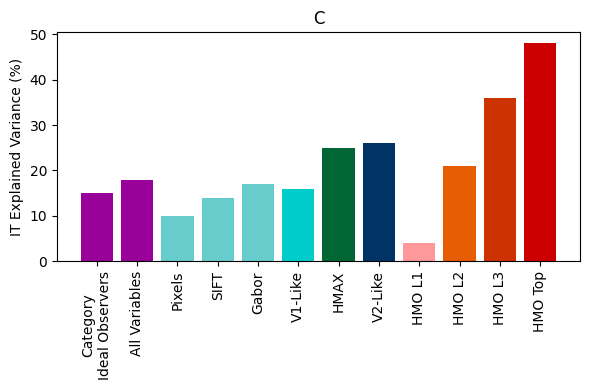

In [2]:
#panel c
import matplotlib.pyplot as plt

# Example mean explained variance data (replace with your real values)
labels = [
    'Category\nIdeal Observers', 'All Variables',
    'Pixels', 'SIFT', 'Gabor', 'V1-Like', 'HMAX', 'V2-Like',
    'HMO L1', 'HMO L2', 'HMO L3', 'HMO Top'
]
values = [15, 18, 10, 14, 17, 16, 25, 26, 4, 21, 36, 48]

# Bar colors for groups
colors = ['#990099', '#990099',
          '#66cccc', '#66cccc', '#66cccc', '#00cccc', '#006633', '#003366',
          '#ff9999', '#e65c00', '#cc3300', '#cc0000']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)

plt.ylabel('IT Explained Variance (%)')
plt.xticks(rotation=90)
plt.title('C')
plt.tight_layout()
plt.show()